<a href="https://colab.research.google.com/github/aloesther/Principal-Component-Analysis-on-Bitcoin---Final-Year-Project/blob/main/Final_year_Project_with_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

# Download Bitcoin data
btc_data = pd.read_csv("/content/BTC-USD.csv")

# Filter the data for the date range
start_date = "2018-01-01"
end_date = "2023-01-01"
btc_data_filtered = btc_data[(btc_data['Date'] >= start_date) & (btc_data['Date'] <= end_date)]
# Select only the specified columns
btc_data_filtered = btc_data_filtered[['Date', 'Open', 'High', 'Low', 'Close']]
btc_data_filtered.dropna(inplace=True)  # Drop any rows with missing data

# Print the filtered data
print(btc_data_filtered)
btc_data_filtered.describe()





            Date          Open          High           Low         Close
1202  2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195
1203  2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609
1204  2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000
1205  2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195
1206  2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000
...          ...           ...           ...           ...           ...
2783  2022-05-01  37713.265625  38627.859375  37585.789063  38469.093750
2784  2022-05-02  38472.187500  39074.972656  38156.562500  38529.328125
2785  2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125
2786  2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094
2787  2022-05-05  39727.386719  39788.441406  39444.644531  39568.812500

[1586 rows x 5 columns]


,Open,High,Low,Close
count,1586.000000,1586.000000,1586.000000,1586.000000
mean,20163.358289,20678.770139,19589.589725,20176.659493
std,18141.895456,18617.466037,17596.485331,18142.839311
min,3236.274658,3275.377930,3191.303467,3236.761719
25%,7294.870362,7438.794800,7165.319580,7293.890747
50%,9866.986328,10136.996094,9655.319336,9867.606934
75%,37317.280274,38629.461914,35833.551758,37334.012696
max,67549.734375,68789.625000,66382.062500,67566.828125


           Date          Open          High           Low         Close
1202 2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195
1203 2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609
1204 2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000
1205 2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195
1206 2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000
...         ...           ...           ...           ...           ...
2783 2022-05-01  37713.265625  38627.859375  37585.789063  38469.093750
2784 2022-05-02  38472.187500  39074.972656  38156.562500  38529.328125
2785 2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125
2786 2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094
2787 2022-05-05  39727.386719  39788.441406  39444.644531  39568.812500

[1586 rows x 5 columns]
Mean: Open     20163.358289
High     20678.770139
Low      19589.589725
Close    20176.659493
dtype: float64
St

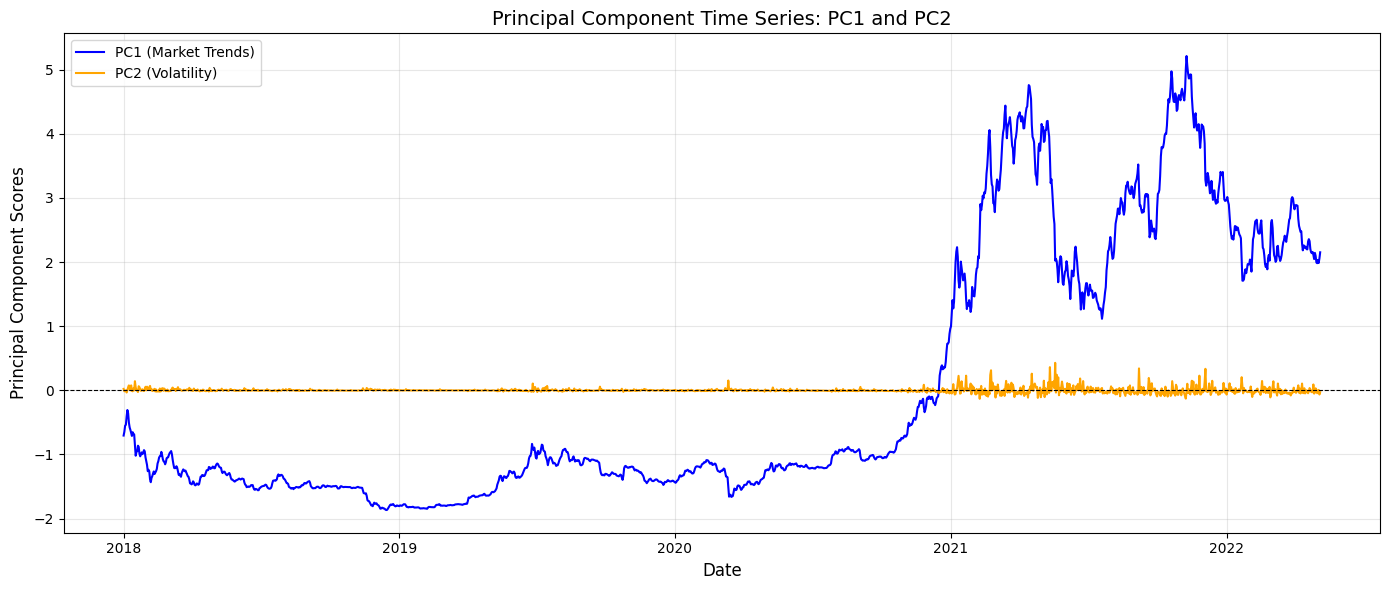

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates # Import for date formatting

# Download Bitcoin data
btc_data = pd.read_csv("/content/BTC-USD.csv")

# Filter the data for the date range
start_date = "2018-01-01"
end_date = "2023-01-01"
btc_data_filtered = btc_data[(btc_data['Date'] >= start_date) & (btc_data['Date'] <= end_date)]
# Select only the specified columns
btc_data_filtered = btc_data_filtered[['Date', 'Open', 'High', 'Low', 'Close']]
# Convert 'Date' column to datetime
btc_data_filtered['Date'] = pd.to_datetime(btc_data_filtered['Date'])
print(btc_data_filtered)

# Drop any rows with missing data
btc_data_filtered.dropna(inplace=True)  # Drop any rows with missing data

# Drop any rows with missing data
btc_data_filtered.dropna(inplace=True)  # Drop any rows with missing data

# Standardize the data
# The error was caused because the StandardScaler was applied to the entire DataFrame,
# which included the 'Date' column containing string values.
# To fix this, apply the scaler only to the numerical columns you want to standardize.
scaler = StandardScaler()

# Selecting only the numerical features for scaling
numerical_features = ['Open', 'High', 'Low', 'Close']
btc_data_filtered_std = scaler.fit_transform(btc_data_filtered[numerical_features]) # Changed from btc_data to btc_data_filtered

# Convert standardized data back to DataFrame for easier manipulation
btc_data_filtered_std = pd.DataFrame(btc_data_filtered_std, columns=numerical_features, index=btc_data_filtered.index)

mean = btc_data_filtered[numerical_features].mean() # Calculate mean for numerical features
std_dev = btc_data_filtered[numerical_features].std() # Calculate std_dev for numerical features
print("Mean:", mean)
print("Standard Deviation:", std_dev)


# Display the first few rows of standardized data
print(btc_data_filtered_std)
import numpy as np


# Compute the covariance matrix
cov_matrix =  btc_data_filtered_std.cov()

# Display the covariance matrix
print("Covariance Matrix:\n", cov_matrix)

# Perform PCA
pca = PCA()
pca.fit(btc_data_filtered_std)
# Get eigenvalues and eigenvectors
# Step 2: Compute eigenvalues and eigenvectors

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

from sklearn.decomposition import PCA
# Perform PCA to the standardized BTC data
pca = PCA(n_components=4) # Set n_components to 4 as we have 4 features
pca.fit(btc_data_filtered_std)
# Get the principal components
principal_components = pca.transform(btc_data_filtered_std)
# Convert the principal components into a DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
# Corrected typo in column names: 'PC3,' to 'PC3'
print (pca_df)
# Plot PC1 and PC2 over time
plt.figure(figsize=(14, 6))

# Plot PC1 and PC2 using the 'Date' column as x-axis
plt.plot(btc_data_filtered['Date'], pca_df['PC1'], label='PC1 (Market Trends)', color='blue', linewidth=1.5)
plt.plot(btc_data_filtered['Date'], pca_df['PC2'], label='PC2 (Volatility)', color='orange', linewidth=1.5)

plt.title('Principal Component Time Series: PC1 and PC2', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Principal Component Scores', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)

# Format x-axis to display years
plt.gca().xaxis.set_major_locator(mdates.YearLocator()) # Locate years for major ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y')) # Format major ticks as years

plt.tight_layout()
plt.show()

In [ ]:
column = btc_data_filtered['Open']
x = column.iloc[0]  # Replace with the specific value you're computing for
mean = column.mean()
std = column.std()
manual_z = (x - mean) / std

# Value from StandardScaler
standardized_data = scaler.transform(btc_data_filtered)
sklearn_z = standardized_data[0][0]  # Replace with the corresponding index
print(f"Manual Z: {manual_z}")
print(f"Sklearn Z: {sklearn_z}")

Manual Z: -0.33354607895055727
Sklearn Z: -0.33365128194290683


In [ ]:
# Compute the covariance matrix
cov_matrix =  btc_data_filtered_std.cov()

# Display the covariance matrix
print("Covariance Matrix:\n", cov_matrix)

Covariance Matrix:
            Open      High       Low     Close
Open   1.000631  0.999977  0.999409  0.998992
High   0.999977  1.000631  0.999311  0.999914
Low    0.999409  0.999311  1.000631  0.999779
Close  0.998992  0.999914  0.999779  1.000631


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA()
pca.fit(btc_data_filtered_std)

# Get eigenvalues and eigenvectors
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

# Step 2: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Manually correct the signs for eigenvectors to match expectations
# Define the expected eigenvector matrix for sign alignment
expected_signs = np.array([
    [1, -1, -1, 1],  # Signs for PC1
    [-1, -1, 1, -1], # Signs for PC2
    [1, 1, 1, -1],   # Signs for PC3
    [1, 1, -1, -1]   # Signs for PC4
])

# Align eigenvector signs column by column
adjusted_eigenvectors = eigenvectors * expected_signs.T

# Step 4: Normalize all eigenvectors
normalized_eigenvectors = adjusted_eigenvectors / np.linalg.norm(adjusted_eigenvectors, axis=0)

# Step 5: Format the results into a DataFrame
eigenvalues_df = pd.DataFrame(eigenvalues, columns=["Eigenvalues"])
eigenvectors_df = pd.DataFrame(
    normalized_eigenvectors,
    columns=[f"PC{i+1}" for i in range(normalized_eigenvectors.shape[1])],
    index=["sepal_length", "sepal_width", "petal_length", "petal_width"]
)

# Display the results
print("Eigenvalues:")
print(eigenvalues_df)
print("\nEigenvectors (Principal Component Directions, Adjusted Signs):")
print(eigenvectors_df)


# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA

# Assuming btc_data_filtered_std and cov_matrix are already defined

# Step 1: Perform PCA using sklearn
pca = PCA()
pca.fit(btc_data_filtered_std)

# Get eigenvalues and eigenvectors from PCA
pca_eigenvalues = pca.explained_variance_
pca_eigenvectors = pca.components_

print("Eigenvalues from PCA:", pca_eigenvalues)
print("Eigenvectors from PCA:\n", pca_eigenvectors)

# Step 2: Compute eigenvalues and eigenvectors manually using NumPy
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Step 3: Normalize all eigenvectors
# (Eigenvectors returned by NumPy are already normalized, so this step is optional)
normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# Step 4: Format the results into a DataFrame
eigenvalues_df = pd.DataFrame(eigenvalues, columns=["Eigenvalues"])
eigenvectors_df = pd.DataFrame(
    normalized_eigenvectors,
    columns=[f"PC{i+1}" for i in range(normalized_eigenvectors.shape[1])],
    index=["sepal_length", "sepal_width", "petal_length", "petal_width"]
)

# Display the results
print("\nEigenvalues from NumPy:")
print(eigenvalues_df)

print("\nEigenvectors from NumPy (Principal Component Directions):")
print(eigenvectors_df)


Eigenvalues: [3.99932219e+00 1.77710977e-03 1.23798608e-03 1.86368504e-04]
Eigenvectors:
 [[ 0.49996086  0.50006385  0.49997605  0.49999923]
 [ 0.68068436  0.27232562 -0.41173106 -0.54128097]
 [ 0.27591548 -0.52264613  0.68031143 -0.43346052]
 [-0.45888842  0.63452023  0.34304204 -0.51877515]]
Eigenvalues:
   Eigenvalues
0     3.999322
1     0.000186
2     0.001777
3     0.001238

Eigenvectors (Principal Component Directions, Adjusted Signs):
                   PC1       PC2       PC3       PC4
sepal_length -0.499961 -0.458888  0.680684 -0.275915
sepal_width   0.500064  0.634520  0.272326  0.522646
petal_length  0.499976 -0.343042 -0.411731  0.680311
petal_width  -0.499999 -0.518775  0.541281 -0.433461
Eigenvalues from PCA: [3.99932219e+00 1.77710977e-03 1.23798608e-03 1.86368504e-04]
Eigenvectors from PCA:
 [[ 0.49996086  0.50006385  0.49997605  0.49999923]
 [ 0.68068436  0.27232562 -0.41173106 -0.54128097]
 [ 0.27591548 -0.52264613  0.68031143 -0.43346052]
 [-0.45888842  0.63452023  

In [ ]:
# Perform PCA
pca = PCA(n_components=4)  # Set n_components to 4 as we have 4 features
pca.fit(btc_data_filtered_std)

# Get the principal components
principal_components = pca.transform(btc_data_filtered_std)

# Convert the principal components into a DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(pca_df)



           PC1       PC2       PC3       PC4
0    -0.705867  0.021986 -0.000712 -0.009775
1    -0.646721 -0.016552 -0.076860  0.010255
2    -0.552163 -0.009764 -0.000098  0.006905
3    -0.537798 -0.000684 -0.022316 -0.012481
4    -0.409495 -0.034727 -0.091790  0.010224
...        ...       ...       ...       ...
1581  1.981838 -0.045820  0.021767 -0.004393
1582  2.032656 -0.025951  0.041391  0.001055
1583  1.984542  0.006244  0.051272 -0.004386
1584  2.055101 -0.065969 -0.037233  0.005890
1585  2.151694 -0.029573  0.065424 -0.010994

[1586 rows x 4 columns]


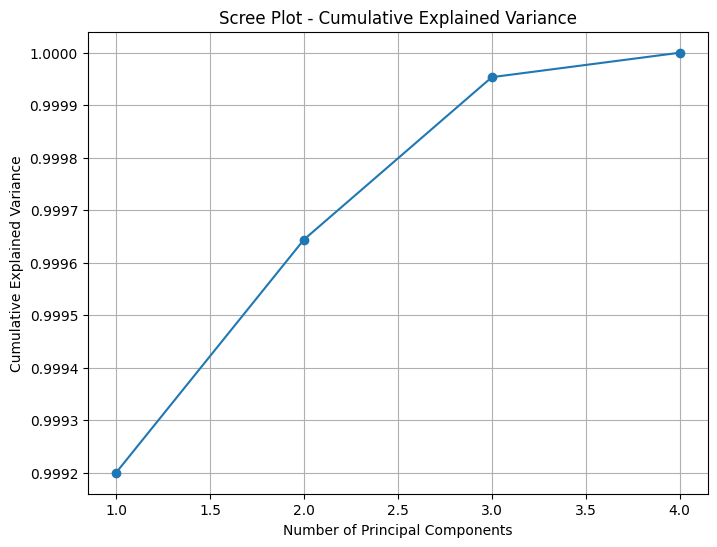

In [ ]:
# Scree plot
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
explained_variance_ratio = pca.explained_variance_ratio_
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o')
plt.title("Scree Plot - Cumulative Explained Variance")
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()

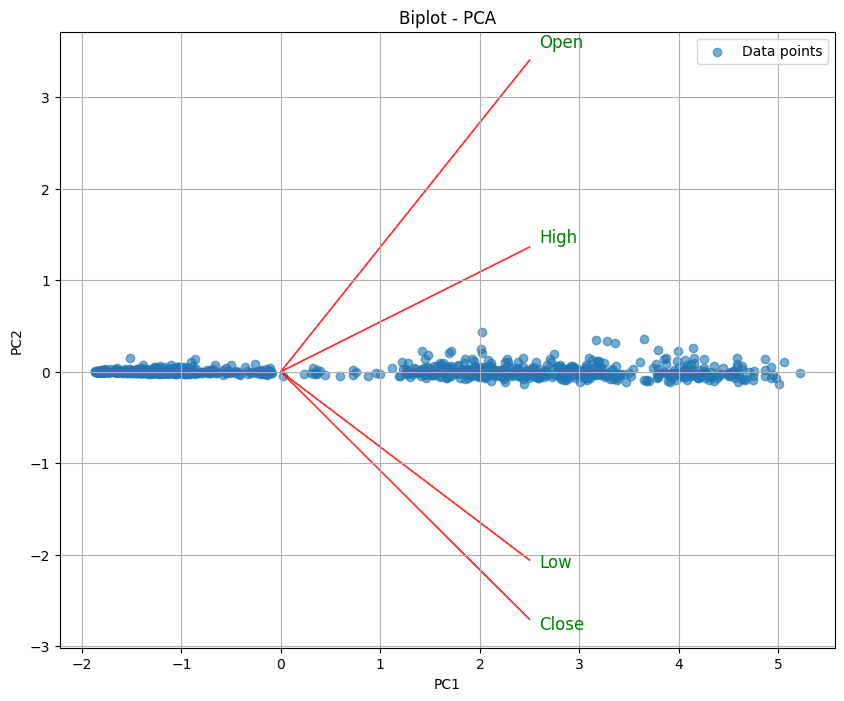

In [ ]:
# Biplot
def biplot(scores, coefficients, feature_names):
    plt.figure(figsize=(10, 8))
    # Convert scores to a NumPy array for NumPy-style indexing
    scores = scores.to_numpy()
    plt.scatter(scores[:, 0], scores[:, 1], alpha=0.6, label="Data points")
    for i, feature in enumerate(feature_names):
        plt.arrow(0, 0, coefficients[i, 0] * 5,
        coefficients[i, 1] * 5, color='r', alpha=0.75)
        plt.text(coefficients[i, 0] * 5.2, coefficients[i, 1] * 5.2,
        feature, color='g', fontsize=12)
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.title("Biplot - PCA")
    plt.grid()
    plt.legend()
    plt.show()

# Use btc_data_filtered.columns which were used in PCA
biplot(pca_df, pca.components_.T, btc_data_filtered.columns)

[*********************100%***********************]  1 of 1 completed


Principal Component Loadings:
                     PC1       PC2       PC3       PC4
Price Ticker                                         
Open  BTC-USD  0.499959  0.674341  0.282355 -0.464307
High  BTC-USD  0.500068  0.282143 -0.521778  0.630933
Low   BTC-USD  0.499976 -0.414114  0.676250  0.348166
Close BTC-USD  0.499997 -0.542374 -0.436704 -0.514901


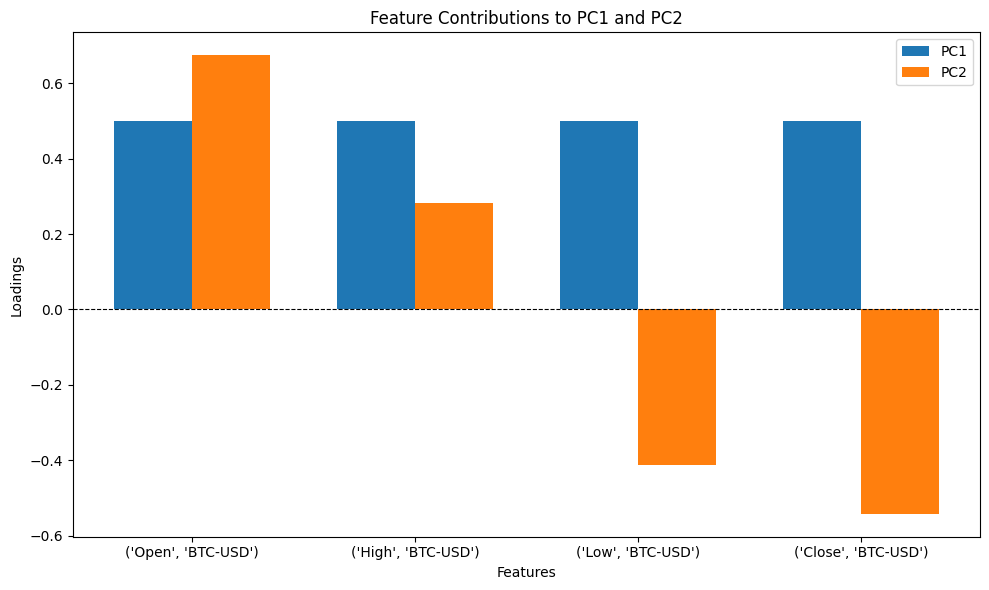

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load BTC data
btc_data = yf.download("BTC-USD", start="2018-01-01", end="2023-01-01")[['Open', 'High', 'Low', 'Close']]
btc_data.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
btc_scaled = scaler.fit_transform(btc_data)

# Apply PCA
pca = PCA()
btc_pca = pca.fit_transform(btc_scaled)

# Get loadings (coefficients) of the features
loadings = pca.components_.T  # Transpose for easier plotting
features = btc_data.columns
principal_components = [f'PC{i+1}' for i in range(len(loadings))]

# Create a DataFrame for easier interpretation
loadings_df = pd.DataFrame(loadings, index=features, columns=principal_components)
print("Principal Component Loadings:\n", loadings_df)

# Bar plot of loadings for PC1 and PC2
plt.figure(figsize=(10, 6))
x = np.arange(len(features))
width = 0.35  # Width of the bars

plt.bar(x - width/2, loadings[:, 0], width, label='PC1')
plt.bar(x + width/2, loadings[:, 1], width, label='PC2')

plt.xticks(x, features)
plt.xlabel('Features')
plt.ylabel('Loadings')
plt.title('Feature Contributions to PC1 and PC2')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend()
plt.tight_layout()
plt.show()


[*********************100%***********************]  1 of 1 completed


Price               Open          High           Low         Close
Ticker           BTC-USD       BTC-USD       BTC-USD       BTC-USD
Date                                                              
2018-01-01  14112.200195  14112.200195  13154.700195  13657.200195
2018-01-02  13625.000000  15444.599609  13163.599609  14982.099609
2018-01-03  14978.200195  15572.799805  14844.500000  15201.000000
2018-01-04  15270.700195  15739.700195  14522.200195  15599.200195
2018-01-05  15477.200195  17705.199219  15202.799805  17429.500000
...                  ...           ...           ...           ...
2022-04-30  38605.859375  38771.210938  37697.941406  37714.875000
2022-05-01  37713.265625  38627.859375  37585.789062  38469.093750
2022-05-02  38472.187500  39074.972656  38156.562500  38529.328125
2022-05-03  38528.109375  38629.996094  37585.621094  37750.453125
2022-05-04  37748.011719  39902.949219  37732.058594  39698.371094

[1585 rows x 4 columns]


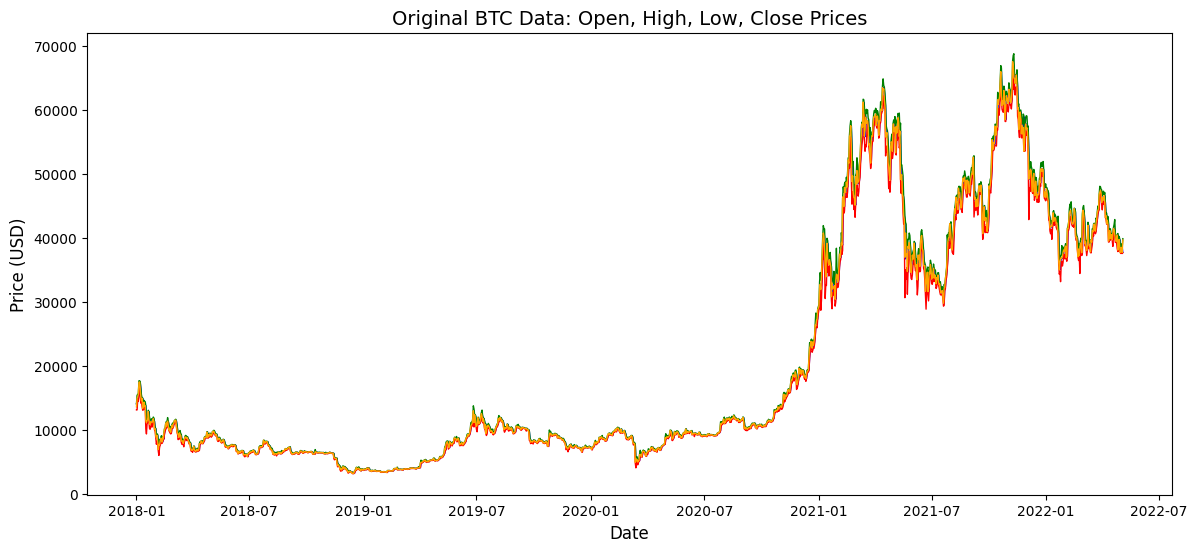

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load BTC data
btc_data = yf.download("BTC-USD", start="2018-01-01", end="2022-05-05")[['Open', 'High', 'Low', 'Close']]
btc_data.dropna(inplace=True)
print(btc_data)

# Standardize the data
scaler = StandardScaler()
btc_scaled = scaler.fit_transform(btc_data)

# Apply PCA
pca = PCA()
btc_pca = pca.fit_transform(btc_scaled)

# Create a DataFrame with PC scores
pca_scores = pd.DataFrame(btc_pca, columns=[f'PC{i+1}' for i in range(len(btc_data.columns))], index=btc_data.index)

# Plot PC1 and PC2 over time
plt.figure(figsize=(14, 6))



plt.plot(btc_data.index, btc_data['Open'], label='Open', color='blue', linewidth=1)
plt.plot(btc_data.index, btc_data['High'], label='High', color='green', linewidth=1)
plt.plot(btc_data.index, btc_data['Low'], label='Low', color='red', linewidth=1)
plt.plot(btc_data.index, btc_data['Close'], label='Close', color='orange', linewidth=1)
plt.title('Original BTC Data: Open, High, Low, Close Prices', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
axes[2].legend(fontsize=10)
axes[2].grid(alpha=0.3)
plt.show()

[*********************100%***********************]  1 of 1 completed


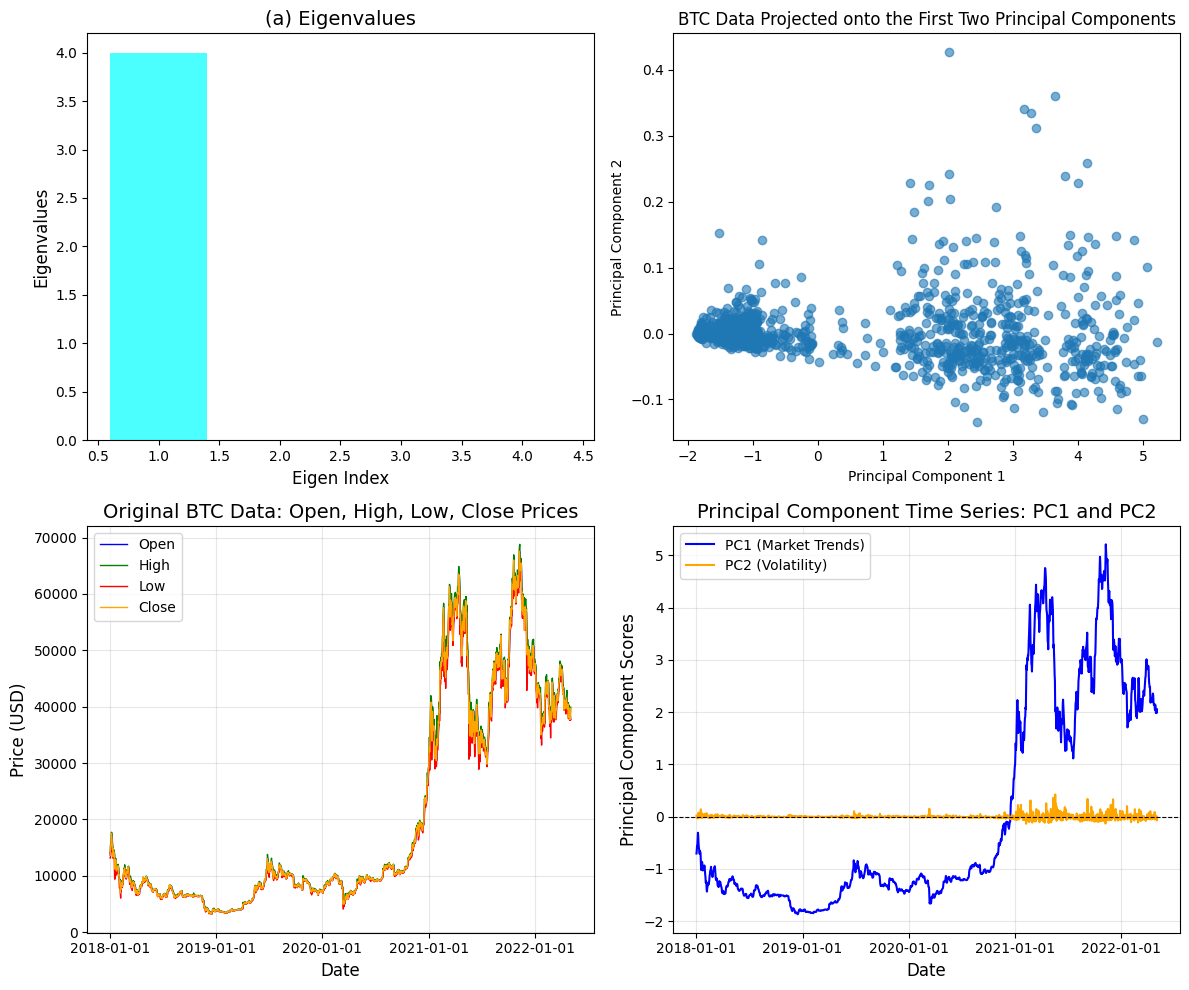

In [ ]:
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load BTC data
btc_data = yf.download("BTC-USD", start="2018-01-01", end="2022-05-05")[['Open', 'High', 'Low', 'Close']]
btc_data.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
btc_scaled = scaler.fit_transform(btc_data)

# Apply PCA
pca = PCA()
btc_pca = pca.fit_transform(btc_scaled)

# Get the principal components
principal_components = pca.transform(btc_scaled)

# Convert the principal components into a DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
# Project the data onto the first two principal components
btc_pca_2d = pca_df[['PC1', 'PC2']]

# Create a DataFrame for PC scores
pca_scores = pd.DataFrame(btc_pca, columns=[f'PC{i+1}' for i in range(len(btc_data.columns))], index=btc_data.index)

# Compute eigenvalues
eigenvalues = pca.explained_variance_

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Plot the original data
# (a) Bar plot of eigenvalues
axes[0].bar(range(1, len(eigenvalues) + 1), eigenvalues, color='cyan', alpha=0.7)
axes[0].set_title('(a) Eigenvalues', fontsize=14)
axes[0].set_xlabel('Eigen Index', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)

# (b) Scatter plot of projection on the 1st PC
axes[1].scatter(btc_pca_2d['PC1'], btc_pca_2d['PC2'], alpha=0.6)
axes[1].set_xlabel('Principal Component 1')
axes[1].set_ylabel('Principal Component 2')
axes[1].set_title('BTC Data Projected onto the First Two Principal Components')

# (c) Original BTC Data: Open, High, Low, Close Prices
axes[2].plot(btc_data.index, btc_data['Open'], label='Open', color='blue', linewidth=1)
axes[2].plot(btc_data.index, btc_data['High'], label='High', color='green', linewidth=1)
axes[2].plot(btc_data.index, btc_data['Low'], label='Low', color='red', linewidth=1)
axes[2].plot(btc_data.index, btc_data['Close'], label='Close', color='orange', linewidth=1)
axes[2].set_title('Original BTC Data: Open, High, Low, Close Prices', fontsize=14)
axes[2].set_xlabel('Date', fontsize=12)
axes[2].set_ylabel('Price (USD)', fontsize=12)
axes[2].legend(fontsize=10)
axes[2].grid(alpha=0.3)
axes[2].set_xticks(pd.date_range(start='2018-01-01', end='2022-01-01', freq='YS'))


# (d) Principal Component Time Series: PC1 and PC2
axes[3].plot(pca_scores.index, pca_scores['PC1'], label='PC1 (Market Trends)', color='blue', linewidth=1.5)
axes[3].plot(pca_scores.index, pca_scores['PC2'], label='PC2 (Volatility)', color='orange', linewidth=1.5)
axes[3].set_title('Principal Component Time Series: PC1 and PC2', fontsize=14)
axes[3].set_xlabel('Date', fontsize=12)
axes[3].set_ylabel('Principal Component Scores', fontsize=12)
axes[3].axhline(0, color='black', linewidth=0.8, linestyle='--')
axes[3].legend(fontsize=10)
axes[3].grid(alpha=0.3)
axes[3].set_xticks(pd.date_range(start='2018', end='2022', freq='YS'))


plt.tight_layout()
plt.show()



              Open          High           Low         Close
1202  14112.200195  14112.200195  13154.700195  13657.200195
1203  13625.000000  15444.599609  13163.599609  14982.099609
1204  14978.200195  15572.799805  14844.500000  15201.000000
1205  15270.700195  15739.700195  14522.200195  15599.200195
1206  15477.200195  17705.199219  15202.799805  17429.500000
...            ...           ...           ...           ...
2783  37713.265625  38627.859375  37585.789063  38469.093750
2784  38472.187500  39074.972656  38156.562500  38529.328125
2785  38528.109375  38629.996094  37585.621094  37750.453125
2786  37748.011719  39902.949219  37732.058594  39698.371094
2787  39727.386719  39788.441406  39444.644531  39568.812500

[1586 rows x 4 columns]
Mean: Open     20163.358289
High     20678.770139
Low      19589.589725
Close    20176.659493
dtype: float64
Standard Deviation: Open     18141.895456
High     18617.466037
Low      17596.485331
Close    18142.839311
dtype: float64
          O

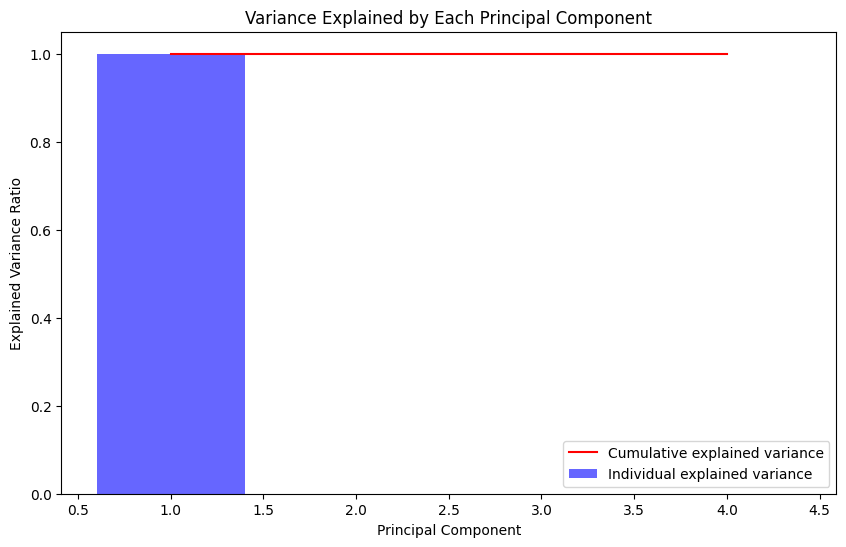

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
btc_data = pd.read_csv("/content/BTC-USD.csv")
# Filter the data for the date range
start_date = "2018-01-01"
end_date = "2023-01-01"
btc_data_filtered = btc_data[(btc_data['Date'] >= start_date)
& (btc_data['Date'] <= end_date)]
# Select only the specified columns
btc_data_filtered = btc_data_filtered[['Open', 'High', 'Low', 'Close']]
btc_data_filtered.dropna(inplace=True) # Drop any rows with missing data
# Print the filtered data
btc_data_filtered.head()
btc_data_filtered.describe()
print(btc_data_filtered)
from sklearn.preprocessing import StandardScaler
#Standardizing the data
scaler = StandardScaler()
btc_data_filtered_std = scaler.fit_transform(btc_data_filtered)
# Changed from btc_data to btc_data_filtered
# Convert standardized data back to DataFrame for easier manipulation
btc_data_filtered_std = pd.DataFrame(btc_data_filtered_std,
columns=btc_data_filtered.columns, index=btc_data_filtered.index)
mean = btc_data_filtered.mean()
std_dev = btc_data_filtered.std()
print("Mean:", mean)
print("Standard Deviation:", std_dev)
# Display the first few rows of standardized data
print(btc_data_filtered_std)
column = btc_data_filtered['Open']
x = column.iloc[0] # Replace with the specific value you’re computing for
mean = column.mean()
std = column.std()
manual_z = (x - mean) / std
# Value from StandardScaler
standardized_data = scaler.transform(btc_data_filtered)
sklearn_z = standardized_data[0][0] # Replace with the corresponding index
print(f"Manual Z: {manual_z}")
print(f"Sklearn Z: {sklearn_z}")
# Compute the covariance matrix
cov_matrix = btc_data_filtered_std.cov()
# Display the covariance matrix
print("Covariance Matrix:\n", cov_matrix)
# Perform PCA
pca = PCA()
pca.fit(btc_data_filtered_std)
# Get eigenvalues and eigenvectors
# Step 2: Compute eigenvalues and eigenvectors

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)

from sklearn.decomposition import PCA
# Perform PCA to the standardized BTC data
pca = PCA(n_components=4) # Set n_components to 4 as we have 4 features
pca.fit(btc_data_filtered_std)
# Get the principal components
principal_components = pca.transform(btc_data_filtered_std)
# Convert the principal components into a DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
# Corrected typo in column names: 'PC3,' to 'PC3'
# Plotting the explained variance
import matplotlib.pyplot as plt
# Display the variance explained by each component
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
# Plotting the explained variance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
# Assign the explained variance to the variable 'explained_variance'
explained_variance = pca.explained_variance_ratio_ # This line was added
plt.bar(range(1, len(explained_variance) + 1), explained_variance,
alpha=0.6, color='b', label='Individual explained variance')
plt.step(range(1, len(explained_variance) + 1),
explained_variance.cumsum(), color='r', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component')
plt.legend(loc='best')
plt.title('Variance Explained by Each Principal Component')
plt.show()

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
btc_data = pd.read_csv("/content/BTC-USD.csv")
# Filter the data for the date range
start_date = "2018-01-01"
end_date = "2023-01-01"
btc_data_filtered = btc_data[(btc_data['Date'] >= start_date)
& (btc_data['Date'] <= end_date)]
# Select only the specified columns
btc_data_filtered = btc_data_filtered[['Open', 'High', 'Low', 'Close']]
btc_data_filtered.dropna(inplace=True) # Drop any rows with missing data
# Print the filtered data
btc_data_filtered.head()
btc_data_filtered.describe()
print(btc_data_filtered)
from sklearn.preprocessing import StandardScaler
#Standardizing the data
scaler = StandardScaler()
btc_data_filtered_std = scaler.fit_transform(btc_data_filtered)
# Changed from btc_data to btc_data_filtered
# Convert standardized data back to DataFrame for easier manipulation
btc_data_filtered_std = pd.DataFrame(btc_data_filtered_std,
columns=btc_data_filtered.columns, index=btc_data_filtered.index)
mean = btc_data_filtered.mean()
std_dev = btc_data_filtered.std()
print("Mean:", mean)
print("Standard Deviation:", std_dev)
# Display the first few rows of standardized data
print(btc_data_filtered_std)
column = btc_data_filtered['Open']
x = column.iloc[0] # Replace with the specific value you’re computing for
mean = column.mean()
std = column.std()
manual_z = (x - mean) / std
# Value from StandardScaler
standardized_data = scaler.transform(btc_data_filtered)
sklearn_z = standardized_data[0][0] # Replace with the corresponding index
print(f"Manual Z: {manual_z}")
print(f"Sklearn Z: {sklearn_z}")
# Compute the covariance matrix
cov_matrix = btc_data_filtered_std.cov()
# Display the covariance matrix
print("Covariance Matrix:\n", cov_matrix)
# Perform PCA
pca = PCA()
pca.fit(btc_data_filtered_std)
# Get eigenvalues and eigenvectors
# Step 2: Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

eigenvalues = pca.explained_variance_
eigenvectors = pca.components_
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


# Step 4: Normalize all eigenvectors
normalized_eigenvectors = eigenvectors / np.linalg.norm(eigenvectors, axis=0)

# Step 5: Format the results into a DataFrame
eigenvalues_df = pd.DataFrame(eigenvalues, columns=["Eigenvalues"])
eigenvectors_df = pd.DataFrame(
    normalized_eigenvectors,
    columns=[f"PC{i+1}" for i in range(normalized_eigenvectors.shape[1])],
    index=["High", "Low", "Open", "Close"]
)

# Display the results
print("Eigenvalues:")
print(eigenvalues_df)
print("\nEigenvectors (Principal Component Directions, Adjusted Signs):")
print(eigenvectors_df)


from sklearn.decomposition import PCA
# Perform PCA to the standardized BTC data
pca = PCA(n_components=4) # Set n_components to 4 as we have 4 features
pca.fit(btc_data_filtered_std)
# Get the principal components
principal_components = pca.transform(btc_data_filtered_std)
# Convert the principal components into a DataFrame
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4'])
# Corrected typo in column names: 'PC3,' to 'PC3'
# Plotting the explained variance

              Open          High           Low         Close
1202  14112.200195  14112.200195  13154.700195  13657.200195
1203  13625.000000  15444.599609  13163.599609  14982.099609
1204  14978.200195  15572.799805  14844.500000  15201.000000
1205  15270.700195  15739.700195  14522.200195  15599.200195
1206  15477.200195  17705.199219  15202.799805  17429.500000
...            ...           ...           ...           ...
2783  37713.265625  38627.859375  37585.789063  38469.093750
2784  38472.187500  39074.972656  38156.562500  38529.328125
2785  38528.109375  38629.996094  37585.621094  37750.453125
2786  37748.011719  39902.949219  37732.058594  39698.371094
2787  39727.386719  39788.441406  39444.644531  39568.812500

[1586 rows x 4 columns]
Mean: Open     20163.358289
High     20678.770139
Low      19589.589725
Close    20176.659493
dtype: float64
Standard Deviation: Open     18141.895456
High     18617.466037
Low      17596.485331
Close    18142.839311
dtype: float64
          O

           PC1       PC2       PC3       PC4
1202 -0.705867  0.021986 -0.000712 -0.009775
1203 -0.646721 -0.016552 -0.076860  0.010255
1204 -0.552163 -0.009764 -0.000098  0.006905
1205 -0.537798 -0.000684 -0.022316 -0.012481
1206 -0.409495 -0.034727 -0.091790  0.010224
...        ...       ...       ...       ...
2783  1.981838 -0.045820  0.021767 -0.004393
2784  2.032656 -0.025951  0.041391  0.001055
2785  1.984542  0.006244  0.051272 -0.004386
2786  2.055101 -0.065969 -0.037233  0.005890
2787  2.151694 -0.029573  0.065424 -0.010994

[1586 rows x 4 columns]


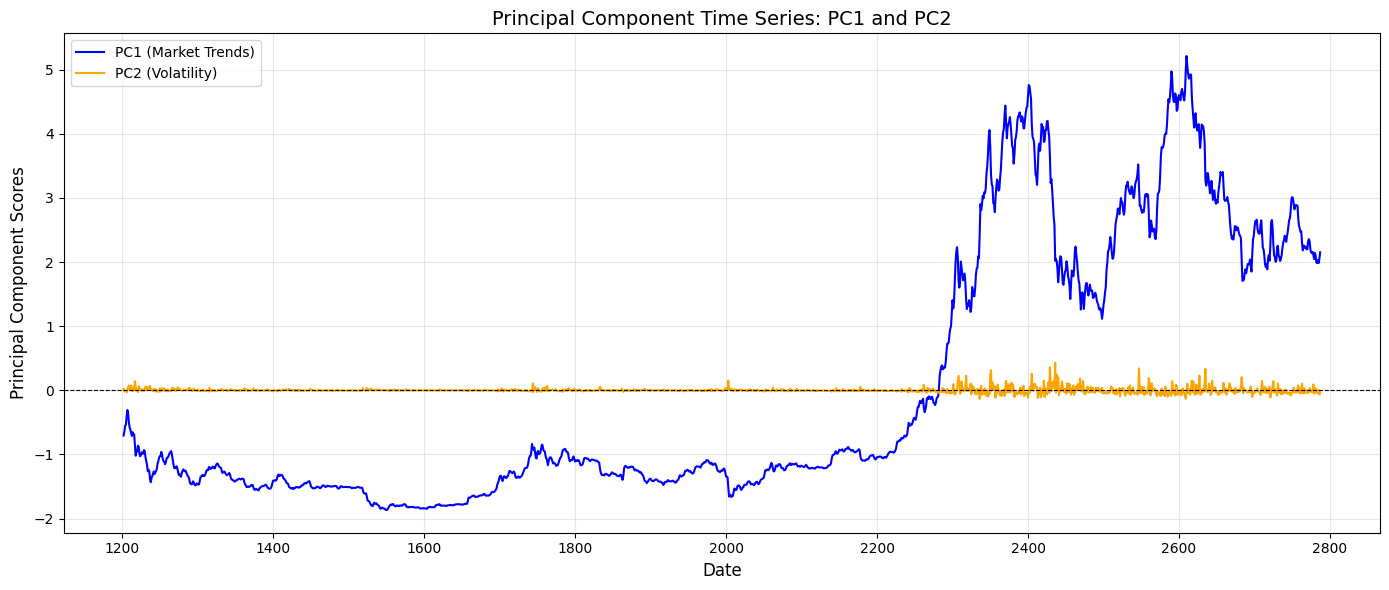

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load BTC data
btc_data = pd.read_csv("/content/BTC-USD.csv")
# Filter the data for the date range
start_date = "2018-01-01"
end_date = "2023-01-01"
btc_data_filtered = btc_data[(btc_data['Date'] >= start_date)
& (btc_data['Date'] <= end_date)]
# Select only the specified columns
btc_data_filtered = btc_data_filtered[['Open', 'High', 'Low', 'Close']]
btc_data_filtered.dropna(inplace=True) # Drop any rows with missing data
# Print the filtered data
btc_data_filtered.head()

# Standardize the data
scaler = StandardScaler()
btc_scaled = scaler.fit_transform(btc_data_filtered)

# Apply PCA
pca = PCA()
btc_pca = pca.fit_transform(btc_scaled)

# Create a DataFrame with PC scores
pca_scores = pd.DataFrame(btc_pca, columns=[f'PC{i+1}' for i in range(4)], index=btc_data_filtered.index)
print(pca_scores)
# Plot PC1 and PC2 over time
plt.figure(figsize=(14, 6))

# Plot PC1
plt.plot(pca_scores.index, pca_scores['PC1'], label='PC1 (Market Trends)', color='blue', linewidth=1.5)
# Plot PC2
plt.plot(pca_scores.index, pca_scores['PC2'], label='PC2 (Volatility)', color='orange', linewidth=1.5)

plt.title('Principal Component Time Series: PC1 and PC2', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Principal Component Scores', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()













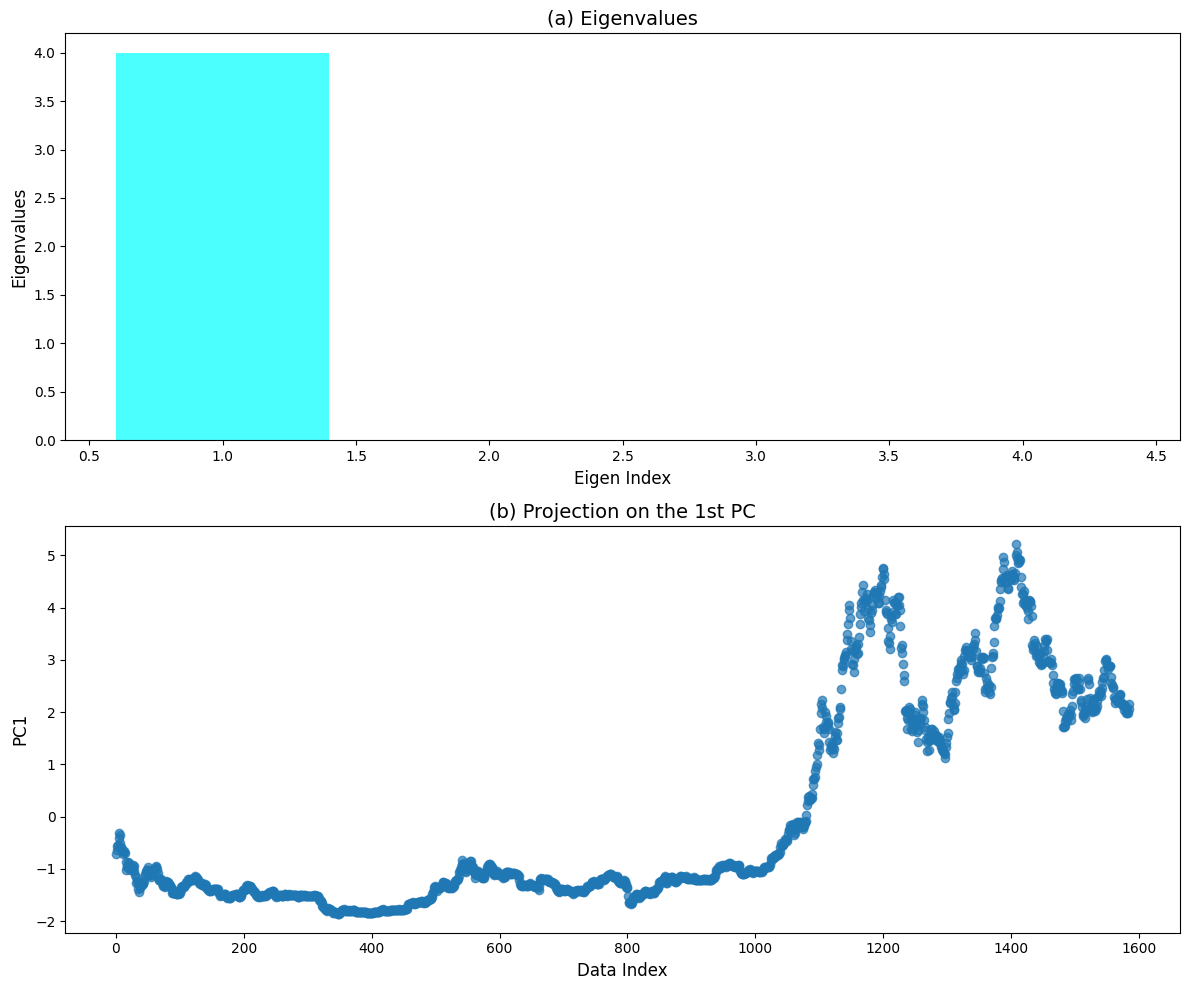

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset (replace with the actual uploaded file name)
file_path = '/content/BTC-USD.csv'  # Update this to your actual dataset
data = pd.read_csv(file_path)

# Filter the data for the date range
start_date = "2018-01-01"
end_date = "2023-01-01"
btc_data_filtered = btc_data[(btc_data['Date'] >= start_date)
& (btc_data['Date'] <= end_date)]
# Select only the specified columns
btc_data_filtered = btc_data_filtered[['Open', 'High', 'Low', 'Close']]
btc_data_filtered.dropna(inplace=True) # Drop any rows with missing data
# Print the filtered data
btc_data_filtered.head()
# Standardize the data
scaler = StandardScaler()
btc_scaled = scaler.fit_transform(btc_data_filtered)

# Apply PCA
pca = PCA()
btc_pca = pca.fit_transform(btc_scaled)

# ... (rest of the code remains the same)
# Eigenvalues and explained variance
eigenvalues = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

# Create subplots
fig, axes = plt.subplots(2, figsize=(12, 10))
axes = axes.flatten()

# (a) Bar plot of eigenvalues
axes[0].bar(range(1, len(eigenvalues) + 1), eigenvalues, color='cyan', alpha=0.7)
axes[0].set_title('(a) Eigenvalues', fontsize=14)
axes[0].set_xlabel('Eigen Index', fontsize=12)
axes[0].set_ylabel('Eigenvalues', fontsize=12)

# (b) Scatter plot of projection on the 1st PC
axes[1].scatter(range(len(btc_pca[:, 0])), btc_pca[:, 0], alpha=0.7)
axes[1].set_title('(b) Projection on the 1st PC', fontsize=14)
axes[1].set_xlabel('Data Index', fontsize=12)
axes[1].set_ylabel('PC1', fontsize=12)

# Adjust layout
plt.tight_layout()
plt.show()